# Perceptron


---
## Table of contents

* [Introduction](#introduction)
* [how does it work?](#how)
* [Why do we need Weights and Bias?](#why)
* [Where we use Perceptron?](#where)
* [ Application in Data](#application)

---
## Introduction<a class="anchor" id="introduction"></a >

Perceptron is a linear classifier (binary). Also, it is used in supervised learning. It helps to classify the given input data. But how the heck it works ?

The perceptron consists of 4 parts.
* Input values or One input layer
* Weights and Bias
* Net sum
* Activation Function

FYI: The Neural Networks work the same way as the perceptron. So, if you want to know how neural network works, learn how perceptron works.
![image](https://miro.medium.com/max/1400/1*n6sJ4yZQzwKL9wnF5wnVNg.png)

---
## But how does it work?<a class="anchor" id="how"></a >

The perceptron works on these simple steps

* a. All the inputs x are multiplied with their weights w. Let’s call it k.

![image](https://miro.medium.com/max/1400/1*_Zy1C83cnmYUdETCeQrOgA.png)

* b. Add all the multiplied values and call them Weighted Sum
![image](https://miro.medium.com/max/1056/1*xFd9VQnUM1H0kiCENsoYxg.gif)

* c. Apply that weighted sum to the correct Activation Function.

For Example: Unit Step Activation Function.
![image](https://miro.medium.com/max/960/1*0iOzeMS3s-3LTU9hYH9ryg.png)

---
## Why do we need Weights and Bias?<a class="anchor" id="why"></a >
Weights shows the strength of the particular node.

A bias value allows you to shift the activation function curve up or down.
![image](https://miro.medium.com/max/1002/1*ztXU57QEETPHGXczHrSWSA.gif)

---
## Where we use Perceptron?<a class="anchor" id="where"></a >

Perceptron is usually used to classify the data into two parts. Therefore, it is also known as a Linear Binary Classifier.
![image](https://miro.medium.com/max/1400/1*xsR57_PO8U7PB_ItLslLmA.png)


## Application in Data<a class="anchor" id="application"></a >

We will implement and train this model on the penguins dataset (which I have stored in a Datasets folder). 

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import a nice function for plotting decision boudaries
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme
sns.set_theme()

# Read the palmerpenguins dataset into a pandas DataFrame object
df = pd.read_csv("palmer_penguins.csv")

In [6]:
df = df.iloc[:220]
df.head()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [7]:
df = df.dropna(how = "any")
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [8]:
df.iloc[:100]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
101,Adelie,Biscoe,41.0,20.0,203.0,4725.0,Male
102,Adelie,Biscoe,37.7,16.0,183.0,3075.0,Female
103,Adelie,Biscoe,37.8,20.0,190.0,4250.0,Male
104,Adelie,Biscoe,37.9,18.6,193.0,2925.0,Female


The perceptron can take in any number of feature measurments, but for simplicity we focus our attention on just two feature measurements, namely "bill length" and "bill depth". Moreover, we need to also convert the string names associated with each species to numerical values.

In [11]:
# Store the desired species values in the numpy array y
y = df.species.values
# Convert each entry of y with setosa to -1 and otherwise 1
y = np.where(y == 'Adelie', -1, 1)

# Store the desired feature measurements in the matrix X
X = df[["bill_length_mm", "bill_depth_mm"]].values

class Perceptron(object):
    def __init__(self, eta = .5, epochs = 50):
        self.eta = eta
        self.epochs = epochs
        
    def train(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1])
        
        self.errors_ = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update*xi
                self.w_[-1] -= update
                errors += int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors_.append(errors)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)
        

Next we can instantiate an instance of the Perceptron class and also train this instance over 1000 epochs by running the following code in the cell below.

In [12]:
# Instantiate one instance of the Perceptron class
percep = Perceptron(epochs = 1000)

# Call the train method to train the weights and bias of the given instance
percep.train(X, y)

In [13]:
# Predict labels on the features in X
y_hat = percep.predict(X)

# Compare y_hat and y
print(y == y_hat)

[ True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True False  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True False  True  True  True
  True  True  True False  True  True  True  True  True False  True  True
  True  True False False  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

As we can see from the output of the code above, the predicted values have matched the true values on the given data. We can visualize this in the Euclidian plane by calling the plot_decision_regions function imported at the top of this notebook. This function will scatter the iris data in the plane and also show the regions of space where a given point will be classified either -1 or 1. It super easy to use and I'm glad I found it! Try running the following code in the cell below.

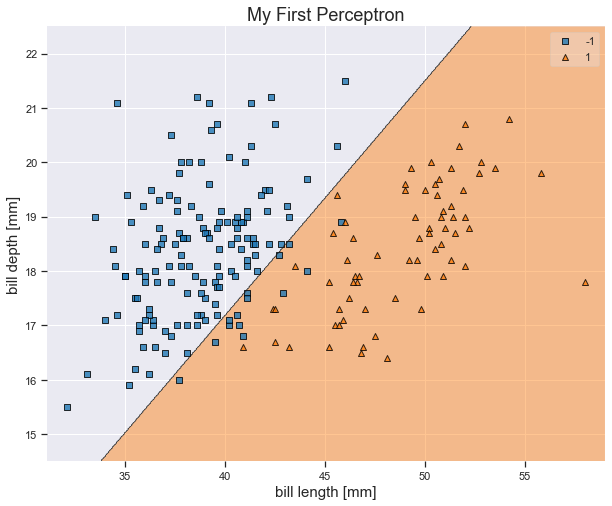

In [14]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = percep)
plt.title("My First Perceptron", fontsize = 18)
plt.xlabel("bill length [mm]", fontsize = 15)
plt.ylabel("bill depth [mm]", fontsize = 15)
plt.show()

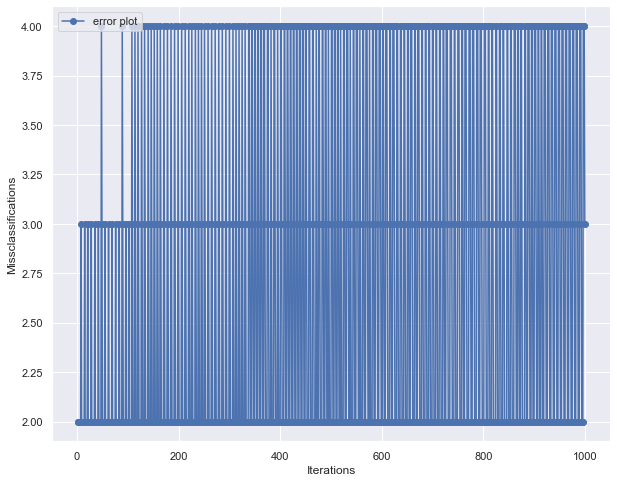

In [16]:
# Error Analysis
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(percep.errors_)+1), percep.errors_, 
         marker = "o",
         label = "error plot",)
plt.xlabel("Iterations")
plt.ylabel("Missclassifications")
plt.legend()
plt.show()